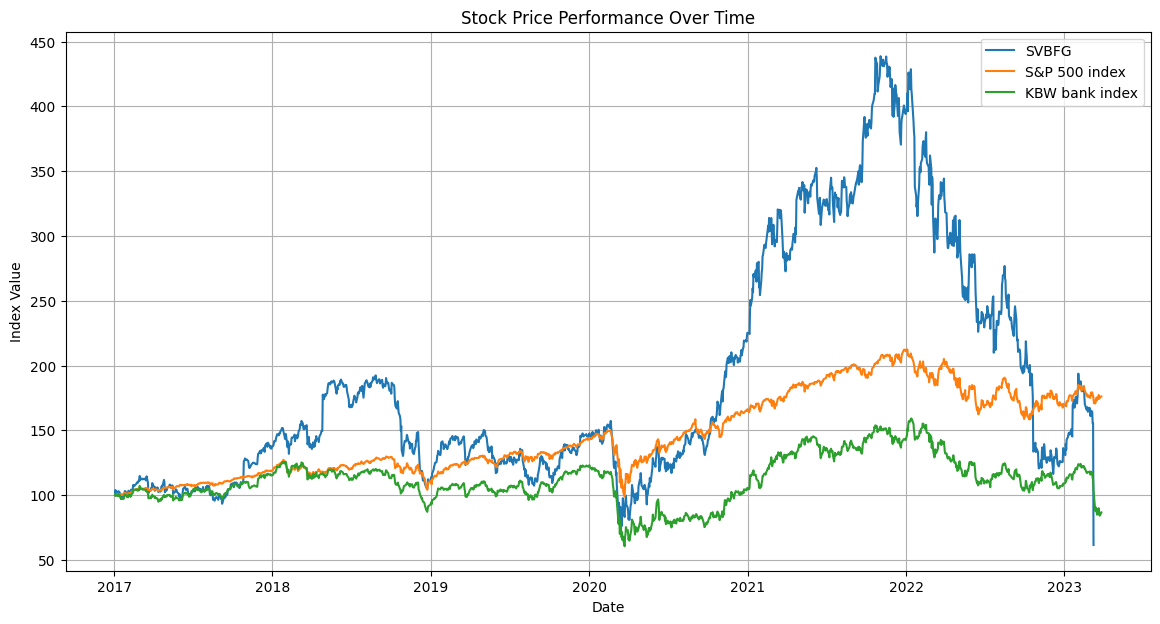


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
file_path = r'C:\Users\deivi\Downloads\stock_price_performance.csv'
stock_price_performance1 = pd.read_csv(file_path)
stock_price_performance1.head()
import matplotlib.pyplot as plt




stock_price_performance1['Date'] = pd.to_datetime(stock_price_performance1['Date'])

plt.figure(figsize=(14, 7))
plt.plot(stock_price_performance1['Date'], stock_price_performance1['SVBFG'], label='SVBFG', marker='o', linestyle='-', markersize=0)
plt.plot(stock_price_performance1['Date'], stock_price_performance1['S&P 500 index'], label='S&P 500 index', marker='o', linestyle='-', markersize=0)
plt.plot(stock_price_performance1['Date'], stock_price_performance1['KBW bank index'], label='KBW bank index', marker='o', linestyle='-', markersize=0)

plt.title('Stock Price Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()


!pip install requests beautifulsoup4

In [2]:
import requests

url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"
response = requests.get(url)
response
import requests

r = requests.get('https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b')
r.status_code
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url, 'html.parser')
import requests
from bs4 import BeautifulSoup
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', attrs={'class': 'pubtables'})


data_list = []


headers = [header.get_text(strip=True) for header in table.find_all('th')]

for row in table.find_all('tr')[1:]: 
    cells = row.find_all('td')
    if not cells:
        continue 
    row_data = {headers[i]: cell.get_text(strip=True) for i, cell in enumerate(cells, start=1)}
    row_data[headers[0]] = row.find('th', {"class": "stub"}).get_text(strip=True)  
    data_list.append(row_data)



    
    svbfg_banking_liabilities = pd.DataFrame(data_list)
svbfg_banking_liabilities

C:\Users\deivi\AppData\Local\Temp\ipykernel_20264\3014118271.py:11: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(url, 'html.parser')


,SVBFG total assets (thousands),SVBFG asset growth index,Industry total assets (thousands),Industry asset growth index,Date
0,"51,218,567",100.00,"21,139,938,363",100.00,12/31/2017
1,"57,020,489",111.33,"21,713,363,144",102.71,12/31/2018
2,"71,384,015",139.37,"22,487,585,206",106.37,12/31/2019
3,"116,046,446",226.57,"26,020,554,981",123.09,12/31/2020
4,"211,483,000",412.90,"28,104,384,426",132.94,12/31/2021
5,"211,786,000",413.49,"27,971,816,824",132.32,12/31/2022


In [3]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id="083b5f8e") 


if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    headers = [header.get_text(strip=True) for header in table.find_all('th')]

   
    for row in table.find_all('tr')[1:]: 
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    us_venture_capital = pd.DataFrame(data_list)

us_venture_capital

,Period,Deal value (billions of $),Deal count
0,2107; Q1,$18.6,"3,125"
1,2017; Q2,$22.8,"2,913"
2,2017; Q3,$25.4,"2,798"
3,2017; Q4,$23.4,"2,831"
4,2018; Q1,$30.7,"3,319"
5,2018; Q2,$32.0,"2,996"
6,2018; Q3,$35.0,"2,823"
7,2018; Q4,$48.1,"3,178"
8,2019; Q1,$40.6,"3,666"
9,2019; Q2,$37.4,"3,283"


In [4]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  # This will raise an error if the request failed


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="20614f67")  # Using the specific ID for accurate targeting


if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    svbfg_liabilities = pd.DataFrame(data_list)

svbfg_liabilities

,Period,Other Liabilities,Subordinated Notes and Debentures,Other Borrowed Money,Interest-Bearing Foreign Deposits,Non-Interest-Bearing Foreign Deposits,Interest-Bearing Domestic Deposits,Non-Interest-Bearing Domestic Deposits,Total
0,2017; Q1,"673,880","741,015","7,876","1,956,534","686,949","5,535,233","32,914,830","42,516,317"
1,2017; Q2,"1,198,234","695,023","32,326","2,128,921","903,321","5,289,999","34,147,438","44,395,262"
2,2017; Q3,"1,040,547","695,256","4,840","2,288,149","993,344","5,661,863","35,875,567","46,559,566"
3,2017: Q4,"1,236,305","695,492","705,557","2,228,958","1,095,885","5,369,619","35,567,336","46,899,152"
4,2018; Q1,"1,589,102","695,731","707,425","2,546,683","1,072,766","5,874,494","37,273,552","49,759,753"
5,2018; Q2,"1,061,533","695,972","418,612","2,554,398","1,089,045","5,739,595","39,541,471","51,100,626"
6,2018; Q3,"1,513,178","696,217","2,259,781","2,344,474","1,767,682","5,777,862","38,749,523","53,108,717"
7,2018; Q4,"1,324,241","696,465","312,380","3,436,435","1,298,850","6,789,042","37,898,233","51,755,646"
8,2019; Q1,"1,416,338","696,716","219,631","3,044,840","1,813,797","10,003,645","37,590,531","54,785,498"
9,2019; Q2,"1,539,392","696,970","219,578","3,421,445","1,453,575","12,857,606","37,906,317","58,094,883"


In [5]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status() 

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id="cd93c7cc")


if table is None:
    print("No table found with the specified attributes.")
else:
   
    data_list = []

   
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

 
    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue 
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    deposit_sv= pd.DataFrame(data_list)

deposit_sv

,Period,Insured domestic deposits,Uninsured domestic deposits,Total
0,Q1 2017,3.56,35.45,39.01
1,Q2 2017,3.65,36.20,39.84
2,Q3 2017,4.09,37.90,41.99
3,Q4 2017,4.05,37.37,41.42
4,Q1 2018,4.09,39.57,43.65
5,Q2 2018,4.38,41.53,45.91
6,Q3 2018,4.54,40.62,45.16
7,Q4 2018,5.71,39.55,45.26
8,Q1 2019,5.86,42.06,47.92
9,Q2 2019,6.58,44.49,51.07


In [6]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  

soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="7bd746eb")


if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    headers = [header.get_text(strip=True) for header in table.find_all('th')]

   
    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue 
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    composition_svbfg_assets= pd.DataFrame(data_list)


composition_svbfg_assets['Period'] =composition_svbfg_assets['Period'].str.replace(' ', '')

financial_columns = ['Other', 'Loans/leases held for investment, net of ALLL', 
                     'Held-to-maturity securities', 'Available-for-sale securities', 'Total assets']
for column in financial_columns:
   composition_svbfg_assets[column] =composition_svbfg_assets[column].str.replace(',', '').astype(int)

composition_svbfg_assets.head()

,Period,Other,"Loans/leases held for investment, net of ALLL",Held-to-maturity securities,Available-for-sale securities,Total assets
0,Q12017,34030432,20184321,8615695,12389341,46419773
1,Q22017,36360561,20739970,9938371,12074736,48435297
2,Q32017,38150233,21940317,11055006,12606631,50756864
3,Q42017,40094684,22851292,12663455,11123883,51218567
4,Q12018,44239093,24313650,14548855,10080384,54319477


In [7]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="e2da4a3a")


if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    
    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)


unrelized_gains_svbfg = pd.DataFrame(data_list)
unrelized_gains_svbfg['Date'] = unrelized_gains_svbfg['Date'].str.replace(';', ':').str.replace(' ', '')
unrelized_gains_svbfg['Held-to-maturity'] = unrelized_gains_svbfg['Held-to-maturity'].str.replace(',', '').astype(int)
unrelized_gains_svbfg['Available-for-sale'] = unrelized_gains_svbfg['Available-for-sale'].str.replace(',', '').astype(int)
unrelized_gains_svbfg['Total'] = unrelized_gains_svbfg['Total'].str.replace(',', '').astype(int)


unrelized_gains_svbfg.head()

,Date,Held-to-maturity,Available-for-sale,Total
0,2017:Q1,-47878,23263,-24615
1,2017:Q2,-27866,17747,-10119
2,2017:Q3,-31591,18773,-12818
3,2017:Q4,-115176,-10344,-125520
4,2018:Q1,-319415,-108688,-428103


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"

response = requests.get(url)
response.raise_for_status()  

soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="c1c8c3ef")


if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]
    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

stock_price_performance = pd.DataFrame(data_list)


import matplotlib.pyplot as plt


stock_price_performance['Date'] = pd.to_datetime(stock_price_performance['Date'])


stock_price_performance['SVBFG'] = stock_price_performance['SVBFG'].interpolate()





C:\Users\deivi\AppData\Local\Temp\ipykernel_20264\3993407813.py:38: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  stock_price_performance['SVBFG'] = stock_price_performance['SVBFG'].interpolate()


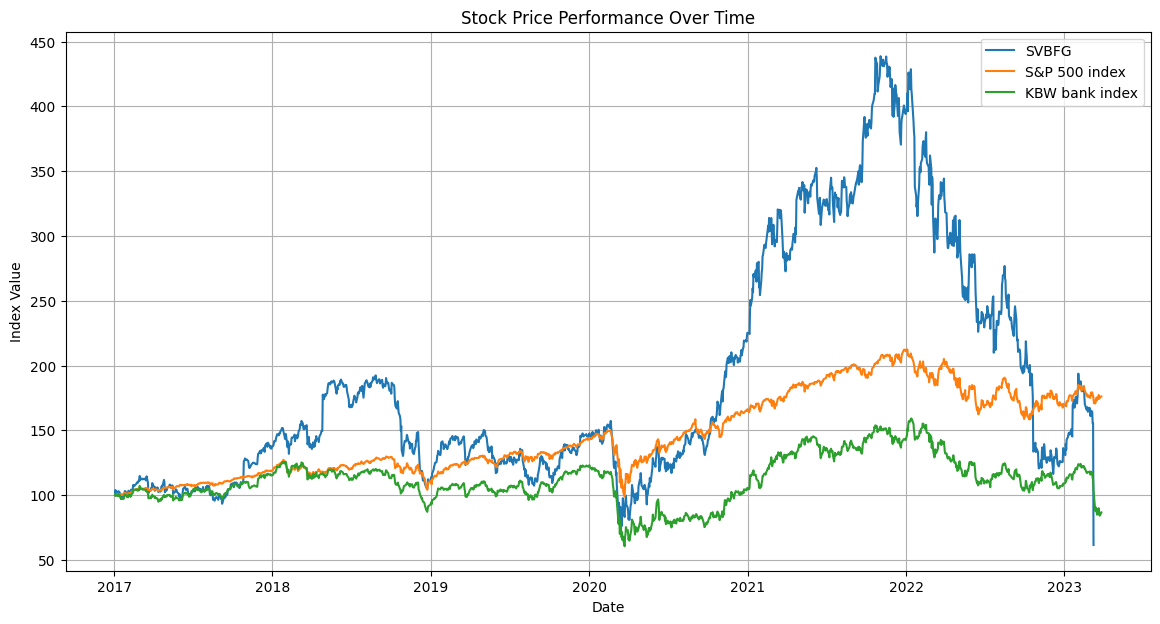

In [9]:
import pandas as pd
file_path = r'C:\Users\deivi\Downloads\stock_price_performance.csv'
stock_price_performance1 = pd.read_csv(file_path)
stock_price_performance1.head()
import matplotlib.pyplot as plt




stock_price_performance1['Date'] = pd.to_datetime(stock_price_performance1['Date'])


plt.figure(figsize=(14, 7))
plt.plot(stock_price_performance1['Date'], stock_price_performance1['SVBFG'], label='SVBFG', marker='o', linestyle='-', markersize=0)
plt.plot(stock_price_performance1['Date'], stock_price_performance1['S&P 500 index'], label='S&P 500 index', marker='o', linestyle='-', markersize=0)
plt.plot(stock_price_performance1['Date'], stock_price_performance1['KBW bank index'], label='KBW bank index', marker='o', linestyle='-', markersize=0)

plt.title('Stock Price Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status() 


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="cca52f2c")


if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]
    for row in table.find_all('tr')[1:]:  # Skip the header ro
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    svb_number_of_supervisory_issues = pd.DataFrame(data_list)


svb_number_of_supervisory_issues

,Year,Number of SVBFG/SVB issues opened,Number of SVBFG/SVB issues closed,Total number of active SVBFG/SVB issues
0,2019,14,14,17
1,2020,9,8,18
2,2021,15,13,20
3,2022,15,5,30
4,2023,1,0,31


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status() 
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id="92d39d9f")

if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    
    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    
    supervision_staffing_relative_to_banking_industry_assets = pd.DataFrame(data_list)


supervision_staffing_relative_to_banking_industry_assets

,Year,Industry assets,Federal Reserve positions
0,2008,100,100
1,2009,111,107
2,2010,112,114
3,2011,114,125
4,2012,122,140
5,2013,122,145
6,2014,127,146
7,2015,129,152
8,2016,140,157
9,2017,144,157


In [12]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  
soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="cfea0852")

# Check if the table is found
if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

    
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    
    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue 
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    
    svbfg_supervision_hours_relative_to_assets = pd.DataFrame(data_list)


svbfg_supervision_hours_relative_to_assets

,Year,SVBFG supervision hours,SVBFG assets
0,2017,100,100
1,2018,92,111
2,2019,65,139
3,2020,56,227
4,2021,91,413
5,2022,203,413


In [13]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id="2d0a427e")
if table is None:
    print("No table found with the specified attributes.")
else:
    data_list = []
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    
    svbfg_supervision_issues = pd.DataFrame(data_list)


svbfg_supervision_issues

,Activity,2017,2018,2019,2020,2021,2022
0,Continuous monitoring,"1,348","1,144",508,"2,430","1,190","12,460"
1,Risk-based target,588,908,669,30,"3,462","3,230"
2,Horizontal/coordinated review,172,479,190,,,"1,842"
3,Mandatory target,"3,905","3,657","4,362",713,"2,816","2,337"
4,BHC inspection/ratings roll-up,"1,105",564,498,,784,"2,473"
5,CAMELS examination,"3,785","3,197",718,"1,660","1,295","1,251"
6,IT examination,"1,270","1,211",975,"2,039","1,559","1,129"
7,Total hours,"12,173","11,160","7,920","6,872","11,106","24,722"


In [14]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="b93a2160")

if table is None:
    print("No table found with the specified attributes.")
else:
   
    data_list = []

    
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    for row in table.find_all('tr')[1:]:  
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    svbfg_supervision_resources_comparison = pd.DataFrame(data_list)


svbfg_supervision_resources_comparison

,Year,SVBFG,Average for peer institutions
0,2018,6.2,4.5
1,2019,4.4,6.2
2,2020,3.82,4.5
3,2021,6.17,9.9
4,2022,13.73,10.1


In [15]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="27f04ade")

if table is None:
    print("No table found with the specified attributes.")
else:
    
    data_list = []

   
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    
    for row in table.find_all('tr')[1:]: 
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

   
    svbfg_supervision_risk_reserve_federal = pd.DataFrame(data_list)


svbfg_supervision_risk_reserve_federal

,Risk type,Number
0,Reputational risk,1
1,Fintech,1
2,BSA/AML,1
3,Climate,2
4,Economic conditions,2
5,Operational resiliency,2
6,Balance sheet trends,3
7,Cyber,4
8,Earnings,5
9,Crypto,5


In [16]:
url = "https://www.federalreserve.gov/publications/2023-April-SVB-Accessibility-Tables.htm#xfigurea-1-totalassetsgrowthindex-21cafb4b"


response = requests.get(url)
response.raise_for_status() 


soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', id="87d70bcf")

if table is None:
    print("No table found with the specified attributes.")
else:
   
    data_list = []

    
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

   
    for row in table.find_all('tr')[1:]: 
        columns = row.find_all(['th', 'td'])
        if not columns:
            continue  
        row_data = {headers[i]: columns[i].get_text(strip=True) for i in range(len(columns))}
        data_list.append(row_data)

    svbfg_common_equity_tier_1_capital_ratios = pd.DataFrame(data_list)


svbfg_common_equity_tier_1_capital_ratios

,Period,SVBFG,SVB
0,2017,12.78,12.06
1,2018,13.41,12.41
2,2019,12.58,11.12
3,2020,11.04,10.70
4,2021,12.09,14.89
5,2022,12.05,15.26


In [17]:



composition_svbfg_assets['Date'] = composition_svbfg_assets['Period'].apply(
    lambda x: f"{x[2:]}:Q{x[1]}"
)


merged_df = pd.merge(unrelized_gains_svbfg,composition_svbfg_assets, on='Date', how='inner')


merged_df.head()

,Date,Held-to-maturity,Available-for-sale,Total,Period,Other,"Loans/leases held for investment, net of ALLL",Held-to-maturity securities,Available-for-sale securities,Total assets
0,2017:Q1,-47878,23263,-24615,Q12017,34030432,20184321,8615695,12389341,46419773
1,2017:Q2,-27866,17747,-10119,Q22017,36360561,20739970,9938371,12074736,48435297
2,2017:Q3,-31591,18773,-12818,Q32017,38150233,21940317,11055006,12606631,50756864
3,2017:Q4,-115176,-10344,-125520,Q42017,40094684,22851292,12663455,11123883,51218567
4,2018:Q1,-319415,-108688,-428103,Q12018,44239093,24313650,14548855,10080384,54319477


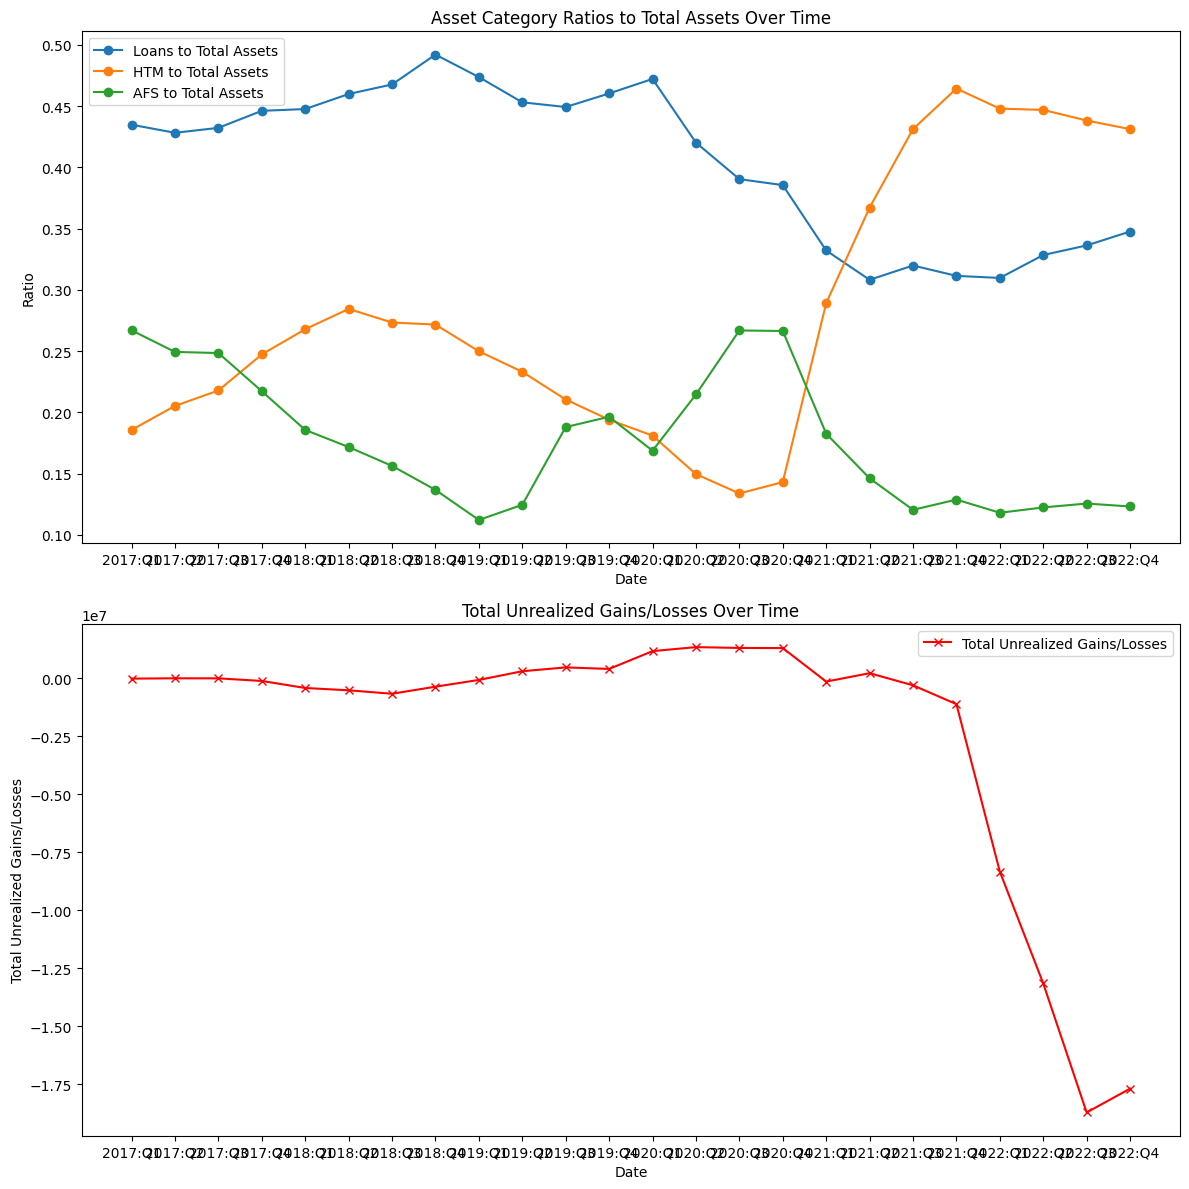

In [18]:
merged_df['Loans_to_Total'] = merged_df['Loans/leases held for investment, net of ALLL'] / merged_df['Total assets']
merged_df['HTM_to_Total'] = merged_df['Held-to-maturity securities'] / merged_df['Total assets']
merged_df['AFS_to_Total'] = merged_df['Available-for-sale securities'] / merged_df['Total assets']


fig, ax = plt.subplots(2, 1, figsize=(12, 12))


ax[0].plot(merged_df['Date'], merged_df['Loans_to_Total'], label='Loans to Total Assets', marker='o')
ax[0].plot(merged_df['Date'], merged_df['HTM_to_Total'], label='HTM to Total Assets', marker='o')
ax[0].plot(merged_df['Date'], merged_df['AFS_to_Total'], label='AFS to Total Assets', marker='o')
ax[0].set_title('Asset Category Ratios to Total Assets Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Ratio')
ax[0].legend()
ax[1].plot(merged_df['Date'], merged_df['Total'], label='Total Unrealized Gains/Losses', color='red', marker='x')
ax[1].set_title('Total Unrealized Gains/Losses Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total Unrealized Gains/Losses')
ax[1].legend()

plt.tight_layout()
plt.show()

1. Asset Category Ratios to Total Assets Over Time
This plot displays the ratios of loans, held-to-maturity (HTM) securities, and available-for-sale (AFS) securities to total assets. Observing these trends can reveal how the bank's asset allocation strategies changed over time and potentially indicate risk concentrations or diversification efforts.

2. Total Unrealized Gains/Losses Over Time
This graph illustrates the total unrealized gains and losses across the periods. Changes in this metric can reflect both market conditions and the bank's responsiveness to these conditions, influencing the bank's financial stability.


Insights:
Correlations: By comparing these two plots, you can look for correlations between asset allocation strategies and financial outcomes, such as whether shifts towards more HTM or AFS securities correlate with periods of increased unrealized losses.

Risk Exposure: Analyzing periods of significant unrealized losses can help identify if high concentrations in certain asset categories correspond to higher risk exposure.


Recommendations:
Diversification: Ensuring a balanced mix of asset categories can mitigate risk.

Regular Reviews: Regularly reviewing and adjusting asset allocations in response to changing market conditions can enhance financial stability.

Risk Management: Developing robust risk management frameworks that adjust to asset composition changes.


TypeError: 'Axes' object is not subscriptable

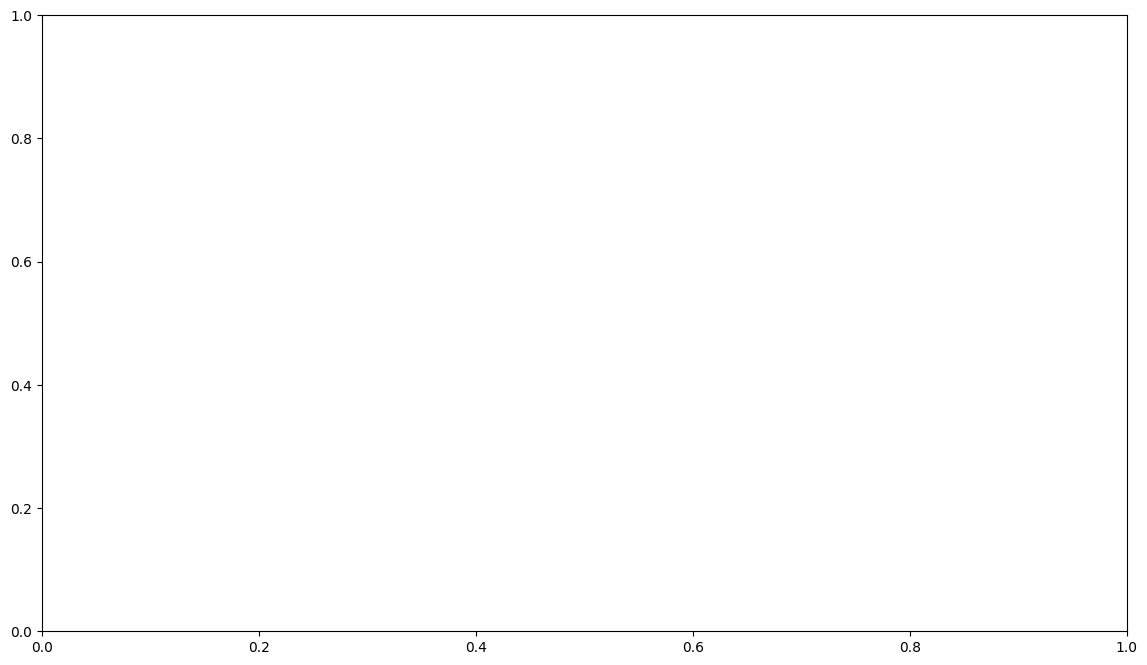

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots( figsize=(14, 8))


axs[0, 0].plot(svbfg_common_equity_tier_1_capital_ratios['Period'], svbfg_common_equity_tier_1_capital_ratios['SVBFG'], marker='o', label='SVBFG')
axs[0, 0].plot(svbfg_common_equity_tier_1_capital_ratios['Period'], svbfg_common_equity_tier_1_capital_ratios['SVB'], marker='o', label='SVB', linestyle='--')
axs[0, 0].set_title('Common Equity Tier 1 Capital Ratios')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Ratio %')
axs[0, 0].legend()
plt.show()


TypeError: 'Axes' object is not subscriptable

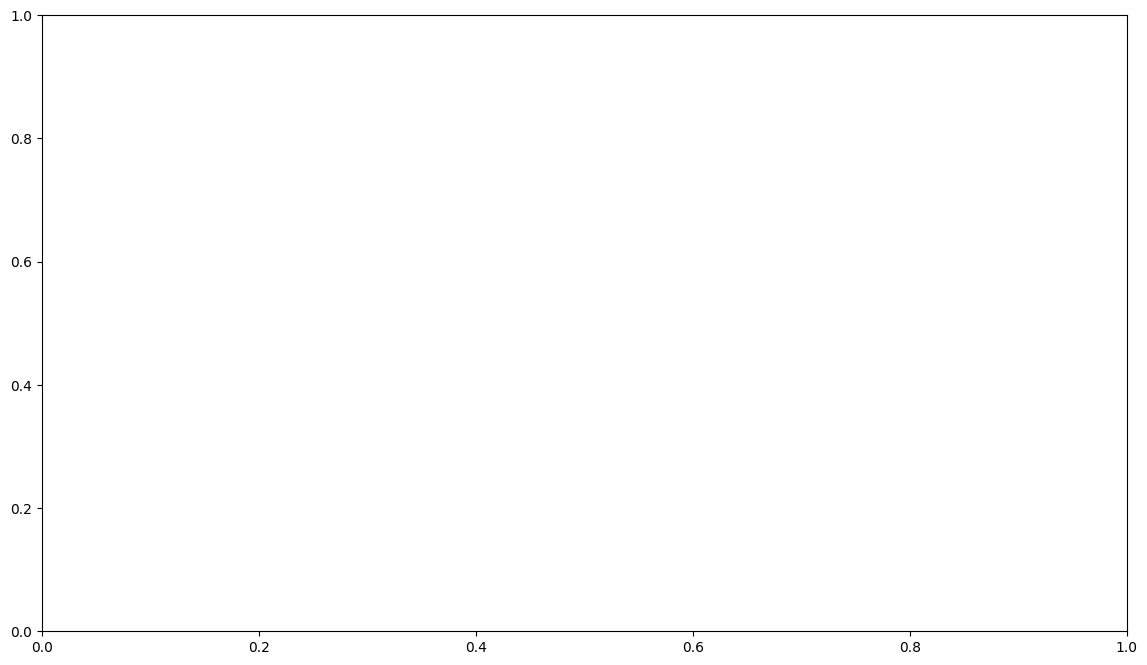

In [24]:
fig, axs = plt.subplots( figsize=(14, 8))

axs[0, 1].bar(svbfg_supervision_risk_reserve_federal['Risk type'], svbfg_supervision_risk_reserve_federal['Number'])
axs[0, 1].set_title('Supervision Risk Reserve Federal')
axs[0, 1].set_xlabel('Risk Type')
axs[0, 1].set_ylabel('Number')
axs[0, 1].tick_params(axis='x', rotation=45)
plt.show()